In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Fonction d'affichage du TP1
def plot_fun(f,dom):
    
    # affichage du graphe d'une fonction de R^2 dans R,
    # de ses lignes de niveau,
    # et valeur de son minimum sur une grille discrète.
    # f : fonction (prenant en entrée un tableau à 2 lignes des points à calculer)
    # dom : domaine de la grille
    
    # Definition des valeurs x1 et x2, des grilles correspondantes et evaluation de f
    x, y = np.linspace(dom[0],dom[1],200), np.linspace(dom[2],dom[3],200)
    x, y = np.meshgrid(x,y)
    z = f(np.array([x.flatten(),y.flatten()])).reshape(x.shape)
    
    # Graphique 3D:
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot_surface(x, y, z)
    ax.set_title('Graphe de la fonction')
    
    # Graphique des lignes de niveaux
    fig, ax = plt.subplots()
    CS = ax.contour(x, y, z)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Lignes de niveau')

In [2]:
# Question 1
def descente_gradient_pas_fixe(f,gradf,x0,eta,eps):
    gf = gradf(x0)
    x = x0
    X = x0
    fX = f(x0)
    while np.linalg.norm(gf) >= eps:
        x = x - eta*gf
        X = np.hstack((X,x))
        fX = np.hstack((fX,f(x)))
        gf = gradf(x)
    return X, fX

In [3]:
# Question 3 : test de la descente de gradient à pas fixe

# On teste d'abord pour f1
def f1(x):
    return x[0,:]**2 + 2*x[1,:]**2 + x[0,:]*x[1,:] + x[0,:] - x[1,:] + 30

def gradf1(x):
    gf = np.array([2*x[0,:]+x[1,:]+1,4*x[1,:]+x[0,:]-1])
    return gf

# Choix de x^(0) : on choisit (3,3) mais tout point de R^2 conviendrait
x0 = np.array([[3],[3]])
# Pas de descente : on a vu qu'on doit avoir eta < 2m/M^2 pour assurer la convergence,
# où m et M sont les bornes inférieure et supérieure des valeurs propres de Hf2(x)
# Ici m=3-sqrt(2)et M=3+sqrt(2) ce qui donne eta < 0.16 environ
eta = 0.15 
# Précision demandée pour le critère d'arrêt
eps = 1e-5

X1, fX1 = descente_gradient_pas_fixe(f1,gradf1,x0,eta,eps)

# Affichage de X1 : séquence des points x^(k) calculés par l'algorithme
# C'est une matrice à deux lignes car chaque point est dans R^2
print(X1)

# Le nombre de colonnes de X1 donne le nombre d'itérations effectuées : 
print(X1.shape[1])
# Ceci renvoie 49, donc le nombre d'itaration est 48 en fait,
# car la 1e colonne correspond à l'initialisation.

[[ 3.          1.5         0.765       0.34275     0.0675375  -0.12646687
  -0.26900447 -0.3758397  -0.45665501 -0.51804179 -0.56475731 -0.60033728
  -0.627446   -0.64810375 -0.66384678 -0.67584474 -0.68498867 -0.69195752
  -0.69726869 -0.70131649 -0.70440146 -0.7067526  -0.70854449 -0.70991014
  -0.71095095 -0.71174418 -0.71234873 -0.71280948 -0.71316063 -0.71342825
  -0.71363221 -0.71378766 -0.71390613 -0.71399642 -0.71406524 -0.71411768
  -0.71415765 -0.71418811 -0.71421133 -0.71422902 -0.71424251 -0.71425279
  -0.71426062 -0.71426659 -0.71427114 -0.7142746  -0.71427725 -0.71427926
  -0.7142808 ]
 [ 3.          0.9         0.285       0.14925     0.1582875   0.20318437
   0.25024378  0.29044818  0.32255523  0.34752034  0.36671441  0.38139936
   0.39261033  0.40116103  0.40767998  0.41264901  0.41643631  0.41932283
   0.42152276  0.42319941  0.42447724  0.42545111  0.42619334  0.42675901
   0.42719012  0.42751869  0.4277691   0.42795995  0.4281054   0.42821626
   0.42830074  0.428365

In [4]:
# L'approximation du minimiseur obtenue par la descente de gradient
# est contenue dans la dernière colonne de X1
print("Minimiseur approché obtenu par la descente de gradient : ",X1[:,-1])
# Ceci est à comparer au minimiseur exact, pour f1 c'est (-5/7,3/7)
print("Minimiseur exact : ",[-5/7,3/7])

Minimiseur approché obtenu par la descente de gradient :  [-0.7142808   0.42856939]
Minimiseur exact :  [-0.7142857142857143, 0.42857142857142855]


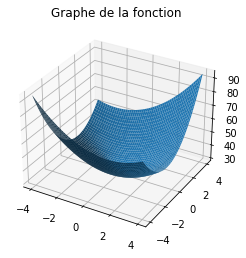

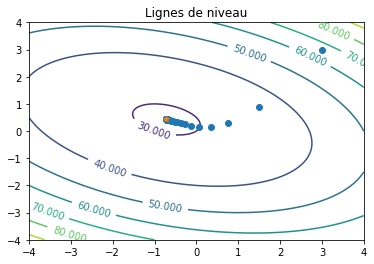

In [5]:
# Affichage graphique
# On affiche d'abord le graphe et les lignes de niveau de la fonction f1
plot_fun(f1,[-4,4,-4,4])

# Sur le graphe des lignes de niveau, on ajoute les points x^(k)
plt.plot(X1[0,:],X1[1,:],'o')

# On ajoute également en rouge le minimiseur exact 
plt.plot(-5/7,3/7,'*')
plt.show()

In [5]:
# On teste à présent avec f2
def f2(x):
    return x[0,:]**2 + 10*x[1,:]**2

def gradf2(x):
    gf = np.array([2*x[0,:],20*x[1,:]])
    return gf

# Choix de x^(0) : on choisit (3,3) mais tout point de R^2 conviendrait
x0 = np.array([[3],[3]])
# Pas de descente : ici m=2 et M=20, donc on doit avoir eta < 0.01 pour assurer la convergence
eta = 0.009
# Précision demandée pour le critère d'arrêt
eps = 1e-5

X2, fX2 = descente_gradient_pas_fixe(f2,gradf2,x0,eta,eps)

# Le nombre de colonnes de X2 moins 1 donne le nombre d'itérations effectuées : 
print("nombre d'itérations : ",X2.shape[1]-1)

print("Minimiseur approché obtenu par la descente de gradient : ",X2[:,-1])

print("Minimiseur exact : ",[0,0])

nombre d'itérations :  733
Minimiseur approché obtenu par la descente de gradient :  [4.95269749e-06 2.00759013e-63]
Minimiseur exact :  [0, 0]


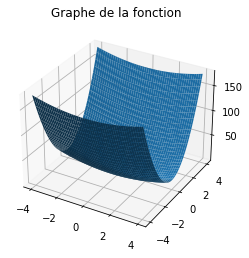

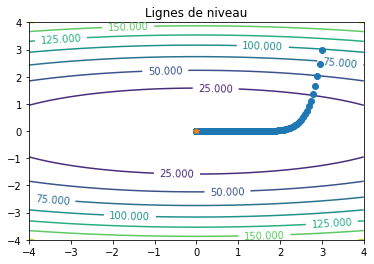

In [7]:
# Affichage graphique

plot_fun(f2,[-4,4,-4,4])
plt.plot(X2[0,:],X2[1,:],'o')
plt.plot(0,0,'*')
plt.show()

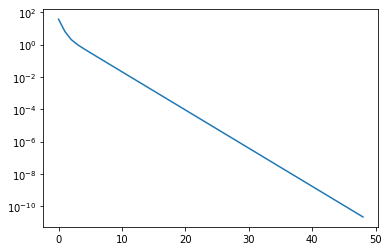

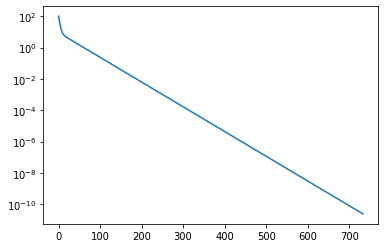

In [8]:
# Question 4

# On visualise la décroissance des f(x^(k))-f(x^*) en fonction de k
# avec une échelle logarithmique pour observer la vitesse de convergence linéaire
xstar1 = np.array([[-5/7],[3/7]])
plt.semilogy(fX1-f1(xstar1))
plt.show()
xstar2 = np.array([[0],[0]])
plt.semilogy(fX2-f2(xstar2))
plt.show()
# On voit que dans les deux cas on obtient une droite, ce qui correspond bien à une vitesse 
# de convergence linéaire comme prévue par la théorie. Cependant la décroissance pour f1 
# est plus rapide (moins d'itérations nécessaires pour atteindre la même précision) 
# car le pas de descente eta peut être choisi plus grand.

nombre d'itérations :  69


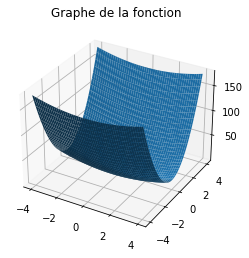

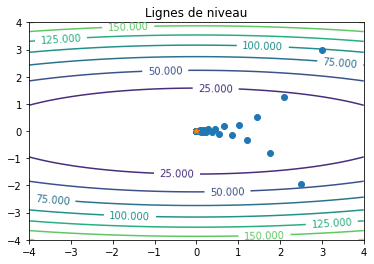

In [9]:
# Question 5

def descente_gradient_rebr(f,gradf,x0,alpha,beta,eps):
    gf = gradf(x0)
    x = x0
    X = x0
    fX = f(x0)
    while np.linalg.norm(gf) >= eps:
        # methode de rebroussement
        eta = 1
        ngf2 = np.linalg.norm(gf)**2
        while f(x-eta*gf) > f(x)-alpha*eta*ngf2:
            eta *= beta
        # descente de gradient
        x = x - eta*gf
        X = np.hstack((X,x))
        fX = np.hstack((fX,f(x)))
        gf = gradf(x)
    return X, fX

# On teste pour f2
x0 = np.array([[3],[3]])
alpha, beta = 0.1, 0.7
eps = 1e-5
X, fX = descente_gradient_rebr(f2,gradf2,x0,alpha,beta,eps)
print("nombre d'itérations : ",X.shape[1]-1)
# On obtient 69 itérations, donc beaucoup moins qu'avec le pas fixe (733)

plot_fun(f2,[-4,4,-4,4])
plt.plot(X[0,:],X[1,:],'o')
plt.plot(0,0,'*')
plt.show()

In [10]:
# Question 6
def hessf2(x):
    return np.array([[2,0],[0,20]])

nombre d'itérations :  1


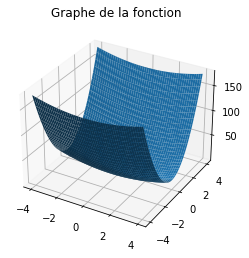

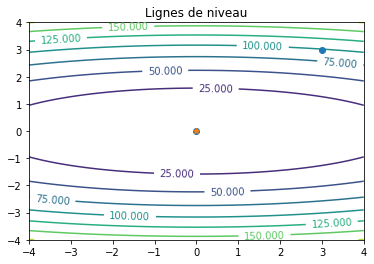

In [11]:
# Question 7
def descente_Newton(f,gradf,hessf,x0,alpha,beta,eps):
    gf = gradf(x0)
    # Pour calculer - Hf(x)^-1 x Gf(x), on pourrait l'écrire directement ainsi :
    # d = -np.linalg.inv(hessf(x0)) @ gf
    # Mais ce n'est pas efficace d'un point de vue numérique, il vaut mieux résoudre un système linéaire :
    d = - np.linalg.solve(hessf(x0),gf)
    x = x0
    X = x0
    fX = f(x0)
    while np.linalg.norm(gf) >= eps:
        # methode de rebroussement
        eta = 1
        while f(x+eta*d) > f(x)+alpha*eta*np.sum(d*gf):
            eta *= beta
        # descente de Newton
        x = x + eta*d
        X = np.hstack((X,x))
        fX = np.hstack((fX,f(x)))
        gf = gradf(x)
        d = - np.linalg.solve(hessf(x),gf)
    return X, fX

x0 = np.array([[3],[3]])
alpha, beta = 0.1, 0.7
eps = 1e-5
X, fX = descente_Newton(f2,gradf2,hessf2,x0,alpha,beta,eps)
print("nombre d'itérations : ",X.shape[1]-1)
# On obtient la convergence avec 1 seule itération, ce qui était prévu car la fonction est 
# quadratique

plot_fun(f2,[-4,4,-4,4])
plt.plot(X[0,:],X[1,:],'o')
plt.plot(0,0,'*')
plt.show()

In [12]:
# Question 8

import numpy as np

def gradient_conjugue(A,b,c,x0,eps):
    fx0 = .5*np.sum((A@x0)*x0)-np.sum(b*x0)+c
    d0 = A @ x0 - b
    t0 = np.sum(d0**2) / np.sum((A@d0)*d0)
    x = x0 - t0 * d0
    fx = .5*np.sum((A@x)*x)-np.sum(b*x)+c
    ng2p = np.sum((A@x0-b)**2)
    g = A@x-b
    ng2 = np.sum(g**2)
    d = d0
    X = np.hstack((x0,x))
    fX = np.hstack((fx0,fx))
    while ng2 > eps**2:
        d = g + ng2 / ng2p * d
        t = np.sum(g*d) / np.sum((A@d)*d)
        x = x - t*d
        X = np.hstack((X,x))
        fx = .5*np.sum((A@x)*x)-np.sum(b*x)+c
        fX = np.hstack((fX,fx))
        g = A@x-b
        ng2p = ng2
        ng2 = np.sum(g**2)
    return X, fX

# Utilisation pour f2:
A = np.array([ [2,0],[0,20]])
b = np.array([ [0],[0]])
c = 0
x0 = np.array([ [3],[3]])
eps = 1e-5
[X,fX] = gradient_conjugue(A,b,c,x0,eps)
print(X)
print(fX)

[[ 3.00000000e+00  2.69730270e+00  0.00000000e+00]
 [ 3.00000000e+00 -2.69730270e-02 -1.20042865e-15]]
[9.90000000e+01 7.28271728e+00 1.44102893e-29]


In [13]:
%history

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Fonction d'affichage du TP1
def plot_fun(f,dom):
    
    # affichage du graphe d'une fonction de R^2 dans R,
    # de ses lignes de niveau,
    # et valeur de son minimum sur une grille discrète.
    # f : fonction (prenant en entrée un tableau à 2 lignes des points à calculer)
    # dom : domaine de la grille
    
    # Definition des valeurs x1 et x2, des grilles correspondantes et evaluation de f
    x, y = np.linspace(dom[0],dom[1],200), np.linspace(dom[2],dom[3],200)
    x, y = np.meshgrid(x,y)
    z = f(np.array([x.flatten(),y.flatten()])).reshape(x.shape)
    
    # Graphique 3D:
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot_surface(x, y, z)
    ax.set_title('Graphe de la fonction')
    
    # Graphique des lignes de niveaux
    fig, ax = plt.subplots()
    CS = ax.contour(x, y, z)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Lignes de niveau')
# Question